# 支持向量机
***Author: NeoWood***

***Date: 2022年3月30日***

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

***SVM效果简单演示***

In [2]:
iris = datasets.load_iris()
feature = iris['data'][:, (2, 3)]
label = iris['target']
select_1 = (label == 0) | (label == 1)
feature = feature[select_1]
label = label[select_1]

In [3]:
model_1 = SVC(kernel='linear')
model_1.fit(feature, label)

SVC(kernel='linear')

In [4]:
def plot_1(model, x_min, x_max):
    w = model.coef_[0]
    b = model.intercept_[0]
    x_0 = np.linspace(x_min, x_max, 200)
    x_1 = -w[0] / w[1] * x_0 - b / w[1]
    m = 1 / w[1]
    up = x_1 + m
    down = x_1 - m
    svs = model.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x_0, x_1, 'k-', linewidth=2)
    plt.plot(x_0, up, 'k--', linewidth=2)
    plt.plot(x_0, down, 'k--', linewidth=2)

Text(0.5, 1.0, 'SVC')

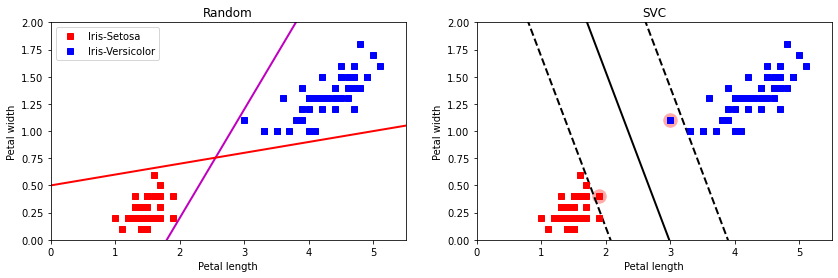

In [5]:
x_axis = np.linspace(0, 5.5, 200)
line_1 = x_axis - 1.8
line_2 = 0.1 * x_axis + 0.5
plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.axis([0, 5.5, 0, 2])
plt.plot(feature[:, 0][label == 0], feature[:, 1][label == 0], 'rs', label='Iris-Setosa')
plt.plot(feature[:, 0][label == 1], feature[:, 1][label == 1], 'bs', label='Iris-Versicolor')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.plot(x_axis, line_1, 'm', linewidth=2)
plt.plot(x_axis, line_2, 'r', linewidth=2)
plt.title('Random')
plt.subplot(122)
plt.axis([0, 5.5, 0, 2])
plot_1(model_1, 0, 5.5)
plt.plot(feature[:, 0][label == 0], feature[:, 1][label == 0], 'rs')
plt.plot(feature[:, 0][label == 1], feature[:, 1][label == 1], 'bs')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('SVC')

***linear核函数简单演示(参数C)***

In [6]:
feature = iris['data'][:, (2, 3)]
label = iris['target']
select_2 = (label == 1) | (label == 2)
feature = feature[select_2]
label = label[select_2]

In [7]:
model_2 = SVC(kernel='linear', C=1)
model_3 = SVC(kernel='linear', C=100)
model_2.fit(feature, label)
model_3.fit(feature, label)

SVC(C=100, kernel='linear')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'C=100')

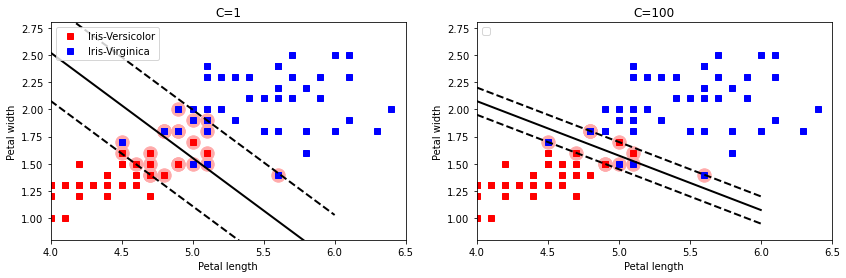

In [8]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.axis([4, 6.5, 0.8, 2.8])
plt.plot(feature[:, 0][label == 1], feature[:, 1][label == 1], 'rs', label='Iris-Versicolor')
plt.plot(feature[:, 0][label == 2], feature[:, 1][label == 2], 'bs', label='Iris-Virginica')
plot_1(model_2, 4, 6)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.title('C=1')

plt.subplot(122)
plt.axis([4, 6.5, 0.8, 2.8])
plt.plot(feature[:, 0][label == 1], feature[:, 1][label == 1], 'rs')
plt.plot(feature[:, 0][label == 2], feature[:, 1][label == 2], 'bs')
plot_1(model_3, 4, 6)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.title('C=100')

***poly核函数演示(参数degree)***

In [9]:
feature, label = datasets.make_moons(n_samples=100, noise=0.2, random_state=100)

In [10]:
def plot_2(x, y):
    plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], 'rs')
    plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], 'bs')
    plt.axis([-1.5, 2.5, -1, 1.5])

In [11]:
def plot_3(model):
    x_0 = np.linspace(-1.5, 2.5, 100)
    x_1 = np.linspace(-1, 1.5, 100)
    x_0, x_1 = np.meshgrid(x_0, x_1)
    loc = np.c_[x_0.ravel(), x_1.ravel()]
    pred = model.predict(loc).reshape(x_0.shape)
    plt.axis([-1.5, 2.5, -1, 1.5])
    plt.contourf(x_0, x_1, pred, cmap=plt.cm.brg, alpha=0.2)

In [12]:
model_4 = SVC(kernel='poly', degree=3)
model_5 = SVC(kernel='poly', degree=10)
model_4.fit(feature, label)
model_5.fit(feature, label)

SVC(degree=10, kernel='poly')

Text(0.5, 1.0, 'degree=10')

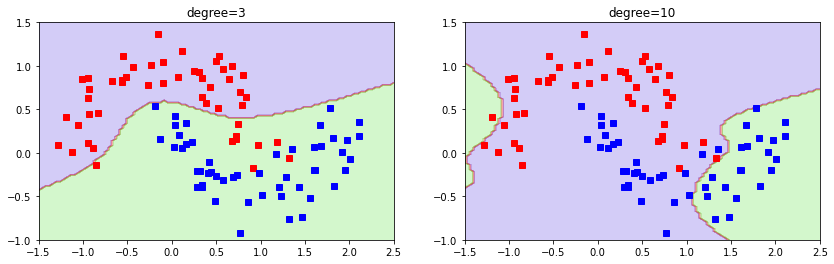

In [13]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
plot_2(feature, label)
plot_3(model_4)

plt.title('degree=3')

plt.subplot(122)
plot_2(feature, label)
plot_3(model_5)
plt.title('degree=10')

***rbf核函数演示(参数gamma)***

In [14]:
model_6 = SVC(kernel='rbf', gamma=1)
model_7 = SVC(kernel='rbf', gamma=100)
model_6.fit(feature, label)
model_7.fit(feature, label)

SVC(gamma=100)

Text(0.5, 1.0, 'gamma=100')

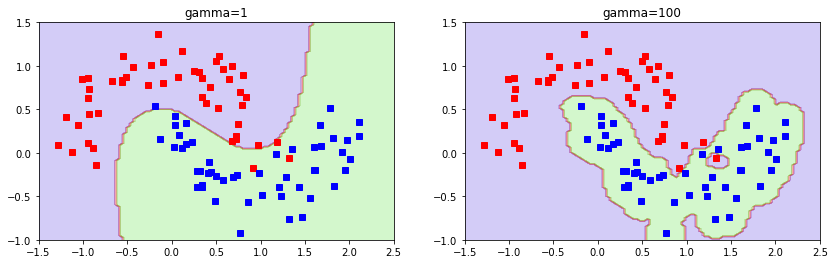

In [15]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
plot_2(feature, label)
plot_3(model_6)
plt.title('gamma=1')

plt.subplot(122)
plot_2(feature, label)
plot_3(model_7)
plt.title('gamma=100')

***支持向量机处理分类问题(手写数字)***

In [16]:
mnist = datasets.load_digits()
feature_train, feature_test, label_train, label_test = train_test_split(mnist.data, mnist.target, test_size=0.25,random_state=100)

model = SVC(kernel='rbf')
model.fit(feature_train, label_train)
pred = model.predict(feature_test)
print('Accuracy:', accuracy_score(label_test, pred))

Accuracy: 0.9911111111111112


***支持向量机处理回归问题(波士顿房价)***

In [17]:
boston = datasets.load_boston()
feature_train, feature_test, label_train, label_test = train_test_split(boston.data, boston.target, test_size=0.25,random_state=100)

model = Pipeline([
    ('std', StandardScaler()),
    ('svr', SVR())
])

model.fit(feature_train, label_train)
pred = model.predict(feature_test)
print("R2:", r2_score(label_test, pred))

R2: 0.6022788596904892


D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

***采用粒子群算法寻找最优参数组合对SVR进行优化***

R2: 0.05231581389269746
R2: -0.0007551158517722367
R2: -0.002039167899455352
R2: 0.42808860061905496
R2: 0.031500247472361576
R2: -0.0009695079785756455
R2: -0.00016441011311441045
R2: -0.0002739331215166896
R2: 0.0033039076089340647
R2: -0.0037707380993472484
R2: 0.0029949634343108267
R2: 0.0007843919704364488
R2: 7.487163535924157e-05
R2: 0.0007800155797539343
R2: -0.0035785853982708282
R2: 0.006154909223650362
R2: -0.005378585648595502
R2: -0.003671274953236603
R2: -0.003861535445141895
R2: -0.0008149831456769618
R2: -0.006527929991255066
R2: 0.05231581389269746
R2: -0.006527929991255066
R2: 0.42808860061905496
R2: -0.0005520246713577315
R2: -0.0007551158517722367
R2: -0.0005520246713577315
R2: 0.42808860061905496
R2: 0.3490368031040395
R2: -0.002039167899455352
R2: 0.3490368031040395
R2: 0.42808860061905496
R2: 0.40615786970663303
R2: 0.42808860061905496
R2: 0.40615786970663303
R2: 0.42808860061905496
R2: 0.06946576369940993
R2: 0.031500247472361576
R2: 0.06946576369940993
R2: 0.42

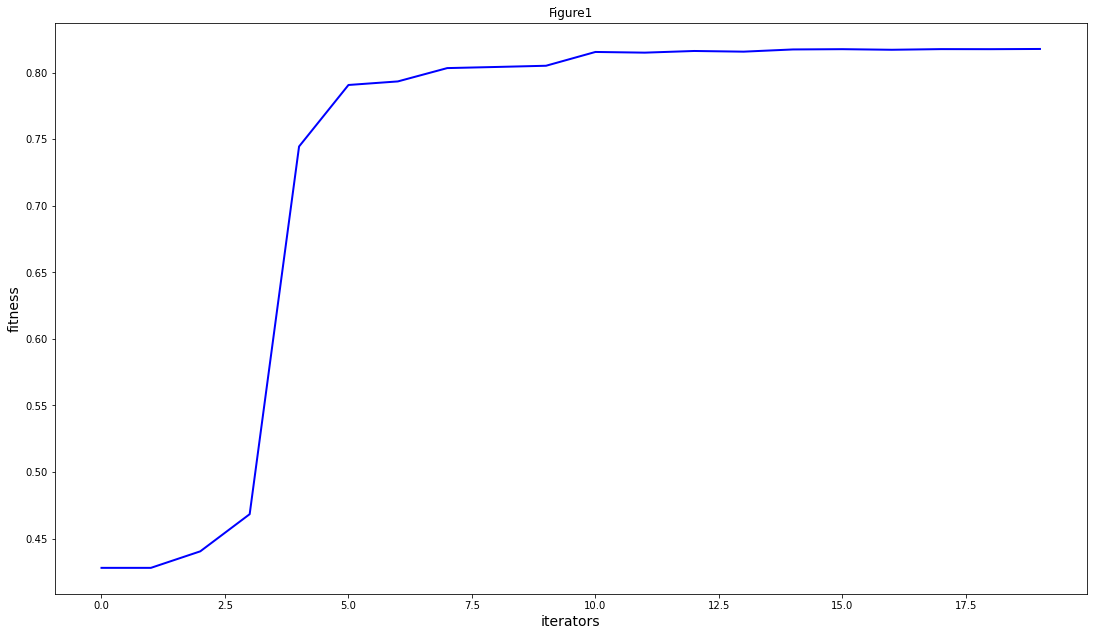

In [23]:
class PSO:
    def __init__(self, parameters):
        self.NGEN = parameters[0]  #迭代的代数
        self.pop_size = parameters[1]  #种群大小
        self.var_num = len(parameters[2])  #变量个数
        self.bound = []  #变量的约束范围
        self.bound.append(parameters[2])
        self.bound.append(parameters[3])

        self.pop_x = np.zeros((self.pop_size, self.var_num))  #所有粒子的位置
        self.pop_v = np.zeros((self.pop_size, self.var_num))  #所有粒子的速度
        self.p_best = np.zeros((self.pop_size, self.var_num))  #每个粒子最优的位置
        self.g_best = np.zeros((1, self.var_num))  #全局最优的位置

        #初始化第0代初始全局最优解
        temp = -1
        for i in range(self.pop_size):
            for j in range(self.var_num):
                self.pop_x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.pop_v[i][j] = random.uniform(0, 1)
            self.p_best[i] = self.pop_x[i]  #储存最优的个体
            fit = self.fitness(self.p_best[i])
            if fit > temp:
                self.g_best = self.p_best[i]
                temp = fit

    def fitness(self, ind_var):  #计算适应值(此处用到的是决定系数R2)
        x1 = ind_var[0]
        x2 = ind_var[1]
        x3 = ind_var[2]
        if x1 == 0: x1 = 0.001
        if x2 == 0: x2 = 0.001
        if x3 == 0: x3 = 0.001
        model = Pipeline([
            ('std', StandardScaler()),
            ('svr', SVR(kernel='rbf', gamma=x3, epsilon=x2, C=x1))
        ])
        model.fit(feature_train, label_train)
        pred = model.predict(feature_test)
        print("R2:", r2_score(label_test, pred))
        return r2_score(label_test, pred)

    def update_operator(self, pop_size):
        c1 = 2  #学习因子
        c2 = 2
        w = 0.4  #自身权重因子
        for i in range(pop_size):
            #更新速度
            self.pop_v[i] = w * self.pop_v[i] + c1 * random.uniform(0, 1) * (
                        self.p_best[i] - self.pop_x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.pop_x[i])
            #更新位置
            self.pop_x[i] = self.pop_x[i] + self.pop_v[i]
            #越界保护
            for j in range(self.var_num):
                if self.pop_x[i][j] < self.bound[0][j]:
                    self.pop_x[i][j] = self.bound[0][j]
                if self.pop_x[i][j] > self.bound[1][j]:
                    self.pop_x[i][j] = self.bound[1][j]
            #更新p_best和g_best
            if self.fitness(self.pop_x[i]) > self.fitness(self.p_best[i]):
                self.p_best[i] = self.pop_x[i]
            if self.fitness(self.pop_x[i]) > self.fitness(self.g_best):
                self.g_best = self.pop_x[i]

    def main(self):
        popobj = []
        self.ng_best = np.zeros((1, self.var_num))[0]
        for gen in range(self.NGEN):
            self.update_operator(self.pop_size)
            popobj.append(self.fitness(self.g_best))
            print('############ GEN: {} ############'.format(str(gen + 1)))
            if self.fitness(self.g_best) > self.fitness(self.ng_best):
                self.ng_best = self.g_best.copy()
            print('Optimum solution: {}'.format(self.ng_best))
            print('R2_MAX: {}'.format(self.fitness(self.ng_best)))
        print("---- END ----")

        plt.figure()
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5)
        plt.title("Figure1")
        plt.xlabel("iterators", size=14)
        plt.ylabel("fitness", size=14)
        t = [t for t in range(self.NGEN)]
        plt.plot(t, popobj, color='b', linewidth=2)
        plt.show()

#参数范围设置为[0,10]、[0,5]、[0,100]，可一共20代，每代20人
if __name__ == '__main__':
   NGEN=20
   popsize=20
   low=[0,0,0]
   up=[10,5,100]
   parameters=[NGEN, popsize, low, up]
   pso=PSO(parameters)
   pso.main()